In [1]:
import pandas as pd

### Data Exploration

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\Employee.csv")

In [3]:
print(data)

     Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


#### Unique Values and Lengths

In [4]:
unique_values = data.nunique()
print("Unique Values:")
print(unique_values)

Unique Values:
Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


#### Statistical analysis

In [6]:
stat_summary = data.describe()
print("\nStatistical Summary:")
print(stat_summary)


Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


### Data Cleaning

#### Replace 0 in Age with NaN

In [7]:
data['Age'].replace(0, pd.NA, inplace=True)

#### Treat missing values

In [9]:
data.fillna({"Age": data['Age'].median(), 'Salary': data['Salary'].mean()}, inplace=True)

#### Remove duplicates

In [10]:
data.drop_duplicates(inplace=True)

#### Outlier treatment

In [12]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from scipy import stats

In [15]:
z_scores = stats.zscore(data['Salary'])
data = data[(z_scores < 3)]

### Data Analysis

In [16]:
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]

In [17]:
import matplotlib.pyplot as plt

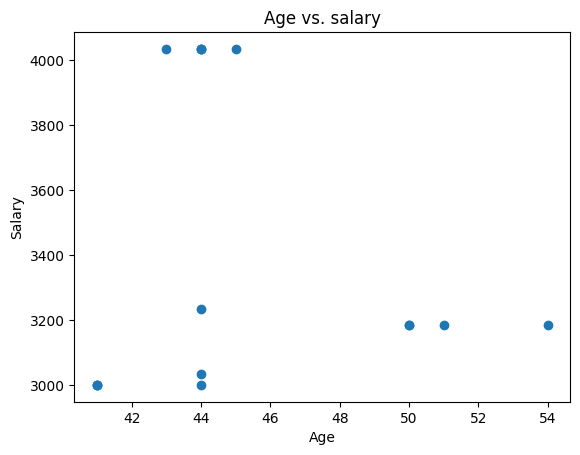

In [18]:
plt.scatter(filtered_data['Age'], filtered_data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. salary')
plt.show()

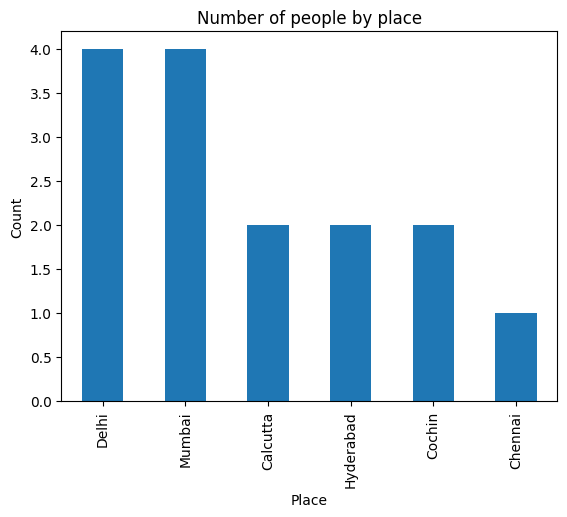

In [19]:
place_counts = filtered_data['Place'].value_counts()
place_counts.plot(kind = 'bar', title = 'Number of people by place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

### Data encoding

In [20]:
encoded_data = pd.get_dummies(filtered_data, columns=['Gender', 'Country'],prefix=['Gender', 'Country'])

### Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(encoded_data[['Age', 'Salary']])

In [26]:
minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(encoded_data[['Age', 'Salary']])